# RNA-seq の発現量解析の結果の可視化
### 講習 「表形式ファイルの処理（Pandas） (遺伝研・坂本)」 で作成した tpm_with_product.tsv を使用する。

### ライブラリのインポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Seaborn にてグラフスタイルを指定

In [2]:
sns.set() 
sns.set_style('whitegrid') 
sns.set_palette('Set1') # カラーパレットの指定 Set1

### tpm_with_product.tsv を データフレーム tpm に格納

In [3]:
tpm = pd.read_table('tpm_with_product.tsv', index_col=0)
tpm.info()
tpm.head()

<class 'pandas.core.frame.DataFrame'>
Index: 66511 entries, ENSMUST00000082392.1 to ENSMUST00000104892.2
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   wt_1             66511 non-null  float64
 1   wt_2             66511 non-null  float64
 2   wt_3             66511 non-null  float64
 3   mutant_1         66511 non-null  float64
 4   mutant_2         66511 non-null  float64
 5   mutant_3         66511 non-null  float64
 6   transcript_name  66511 non-null  object 
 7   gene_id          66511 non-null  object 
 8   gene_name        66458 non-null  object 
 9   description      66458 non-null  object 
dtypes: float64(6), object(4)
memory usage: 5.6+ MB


,wt_1,wt_2,wt_3,mutant_1,mutant_2,mutant_3,transcript_name,gene_id,gene_name,description
transcript_id,,,,,,,,,,
ENSMUST00000082392.1,3827.160918,6997.591290,4142.728550,3760.466540,3431.461573,6816.806391,mt-Nd1-201,ENSMUSG00000064341,mt-Nd1,mitochondrially encoded NADH dehydrogenase 1 [...
ENSMUST00000082396.1,2789.780229,4888.041645,2494.352104,2340.315938,2465.722778,4939.294983,mt-Nd2-201,ENSMUSG00000064345,mt-Nd2,mitochondrially encoded NADH dehydrogenase 2 [...
ENSMUST00000082402.1,5473.715014,11775.036281,6695.282675,7199.326865,7677.455631,11257.516939,mt-Co1-201,ENSMUSG00000064351,mt-Co1,mitochondrially encoded cytochrome c oxidase I...
ENSMUST00000082405.1,4091.154892,8624.462767,3794.312528,2514.256397,3667.110133,8602.764457,mt-Co2-201,ENSMUSG00000064354,mt-Co2,mitochondrially encoded cytochrome c oxidase I...
ENSMUST00000082407.1,3457.787163,6542.109723,3499.266048,3228.979622,3243.172745,7595.596472,mt-Atp8-201,ENSMUSG00000064356,mt-Atp8,mitochondrially encoded ATP synthase 8 [Source...


### wt, mutant それぞれ 3 サンプルの平均 TPM が > 1のデータを抽出

In [4]:
tpm = tpm[((tpm['wt_1'] + tpm['wt_2'] + tpm['wt_3']) / 3) > 1]
tpm = tpm[((tpm['mutant_1'] + tpm['mutant_2'] + tpm['mutant_3']) / 3) > 1]

tpm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23785 entries, ENSMUST00000082392.1 to ENSMUST00000168621.4
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   wt_1             23785 non-null  float64
 1   wt_2             23785 non-null  float64
 2   wt_3             23785 non-null  float64
 3   mutant_1         23785 non-null  float64
 4   mutant_2         23785 non-null  float64
 5   mutant_3         23785 non-null  float64
 6   transcript_name  23785 non-null  object 
 7   gene_id          23785 non-null  object 
 8   gene_name        23782 non-null  object 
 9   description      23782 non-null  object 
dtypes: float64(6), object(4)
memory usage: 2.0+ MB


## 各サンプルの TPM のヒストグラムを確認  
### TPM の log10 をとり データフレーム log_tpm に格納

In [5]:
log_tpm = tpm.copy()

log_tpm['log_wt_1']=np.log10(tpm['wt_1'] + 1.0)
log_tpm['log_wt_2']=np.log10(tpm['wt_2'] + 1.0)
log_tpm['log_wt_3']=np.log10(tpm['wt_3'] + 1.0)

log_tpm['log_mutant_1']=np.log10(tpm['mutant_1'] + 1.0)
log_tpm['log_mutant_2']=np.log10(tpm['mutant_2'] + 1.0)
log_tpm['log_mutant_3']=np.log10(tpm['mutant_3'] + 1.0)

log_tpm = log_tpm[['transcript_name', 'log_wt_1', 'log_wt_2', 'log_wt_3', 'log_mutant_1', 'log_mutant_2', 'log_mutant_3']]


log_tpm.info()
log_tpm.head()



<class 'pandas.core.frame.DataFrame'>
Index: 23785 entries, ENSMUST00000082392.1 to ENSMUST00000168621.4
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transcript_name  23785 non-null  object 
 1   log_wt_1         23785 non-null  float64
 2   log_wt_2         23785 non-null  float64
 3   log_wt_3         23785 non-null  float64
 4   log_mutant_1     23785 non-null  float64
 5   log_mutant_2     23785 non-null  float64
 6   log_mutant_3     23785 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.5+ MB


,transcript_name,log_wt_1,log_wt_2,log_wt_3,log_mutant_1,log_mutant_2,log_mutant_3
transcript_id,,,,,,,
ENSMUST00000082392.1,mt-Nd1-201,3.582990,3.845011,3.617391,3.575357,3.535606,3.833645
ENSMUST00000082396.1,mt-Nd2-201,3.445726,3.689224,3.397132,3.369460,3.392120,3.693753
ENSMUST00000082402.1,mt-Co1-201,3.738362,4.070999,3.825834,3.857352,3.885274,4.051481
ENSMUST00000082405.1,mt-Co2-201,3.611952,3.935782,3.579248,3.400582,3.564442,3.934689
ENSMUST00000082407.1,mt-Atp8-201,3.538924,3.815784,3.544101,3.509200,3.511104,3.880619


### wt 3サンプルを重ねて描画

Text(0, 0.5, 'frequency')

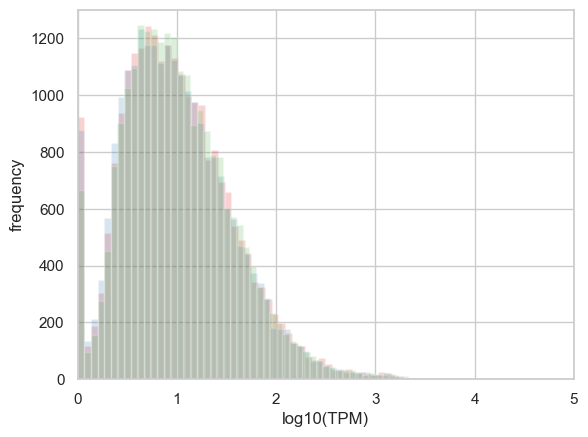

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(log_tpm['log_wt_1'], bins='scott', alpha=0.2)
ax.hist(log_tpm['log_wt_2'], bins='scott', alpha=0.2)
ax.hist(log_tpm['log_wt_3'], bins='scott', alpha=0.2)


ax.set_xlim(0, 5)
ax.set_ylim(0, 1300)

ax.set_xlabel('log10(TPM)')
ax.set_ylabel('frequency')

### mutant 3サンプルを重ねて描画

Text(0, 0.5, 'frequency')

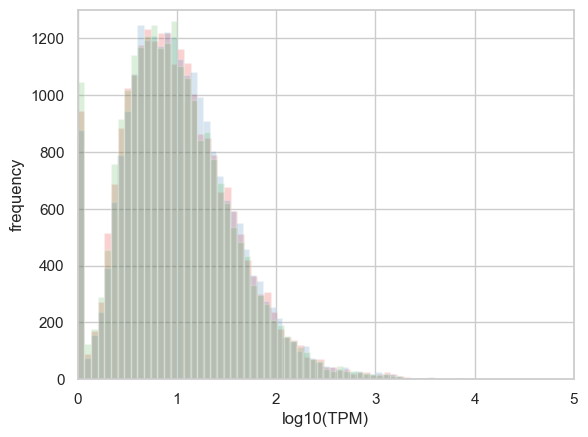

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(log_tpm['log_mutant_1'], bins='scott', alpha=0.2)
ax.hist(log_tpm['log_mutant_2'], bins='scott', alpha=0.2)
ax.hist(log_tpm['log_mutant_3'], bins='scott', alpha=0.2)


ax.set_xlim(0, 5)
ax.set_ylim(0, 1300)

ax.set_xlabel('log10(TPM)')
ax.set_ylabel('frequency')


### joypy パッケージを使って 6 サンプルの TPM のヒストグラムを上下にずらして表示

Text(0.5, 19.049999999999997, 'log10(TPM)')

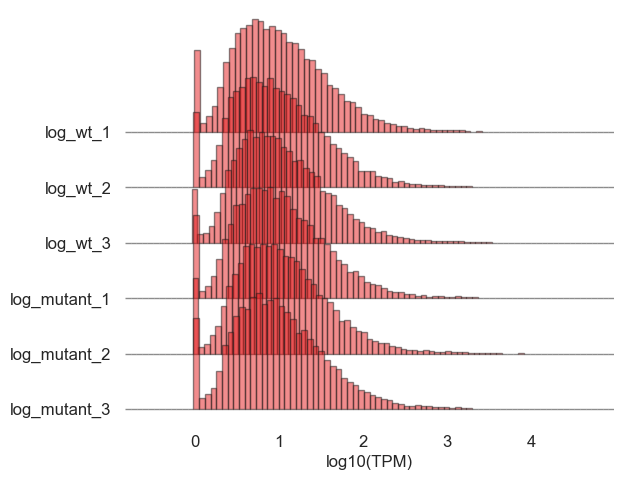

In [8]:
import joypy

fig, axes = joypy.joyplot(log_tpm, hist=True, bins='scott', alpha=0.5)
axes[-1].set_xlabel('log10(TPM)')


## 発現変動遺伝子をマークアップしたMAプロット

MAプロットとは、遺伝子ごとの発現量について、そのばらつきや実験群間での差異を概観できるグラフ    

DEG (differentially expressed genes)  
fold change の絶対値が > 4 (log2 では 2) のデータを発現変動遺伝子とする。

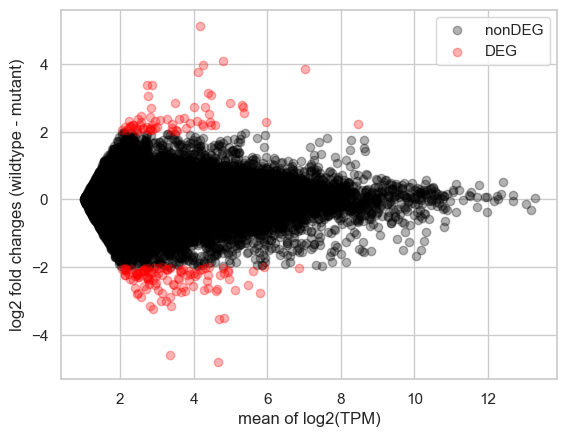

In [9]:
wt_log_tpm_mean=np.log2((tpm['wt_1'] + tpm['wt_2'] + tpm['wt_3']) / 3 + 1.0) # wild type 3サンプルの平均 TPM
mutant_log_tpm_mean=np.log2((tpm['mutant_1'] + tpm['mutant_2'] + tpm['mutant_3']) / 3  + 1.0) # mutant 3サンプルの平均 TPM

mu = (wt_log_tpm_mean + mutant_log_tpm_mean) / 2
fc = wt_log_tpm_mean - mutant_log_tpm_mean

is_DEG = np.array([False] * len(fc))
is_DEG[(np.abs(fc) > 2)] = True #fold change の絶対値が > 2 のデータを発現変動遺伝子とする。

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(mu[np.logical_not(is_DEG)], fc[np.logical_not(is_DEG)],   # DEG ではない遺伝子の描画
           color='black', alpha=0.3, label='nonDEG')
ax.scatter(mu[is_DEG], fc[is_DEG], color='red', alpha=0.3, label='DEG') # DEG の描画

ax.set_xlabel('mean of log2(TPM)')
ax.set_ylabel('log2 fold changes (wildtype - mutant)')
ax.legend()

## wt と mutant の log2TPM を散布図とヒストグラムを一つのグラフに描画  

seaborn の jointplot() を使用すると簡単に描画できる。

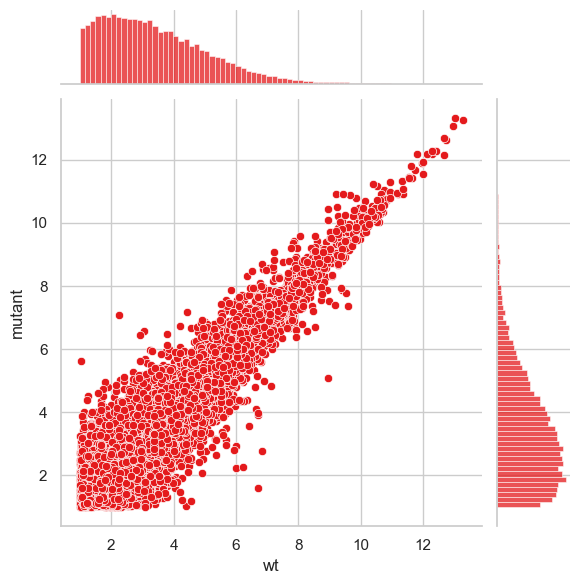

In [10]:
wt_log_tpm_mean=np.log2((tpm['wt_1'] + tpm['wt_2'] + tpm['wt_3']) / 3 + 1.0) # wild type 3サンプルの平均 TPM
mutant_log_tpm_mean=np.log2((tpm['mutant_1'] + tpm['mutant_2'] + tpm['mutant_3']) / 3  + 1.0) # mutant 3サンプルの平均 TPM

log_tpm_lib_mean = pd.DataFrame({'wt' : wt_log_tpm_mean,
                                'mutant' : mutant_log_tpm_mean})


sns.jointplot(x='wt', y='mutant', data=log_tpm_lib_mean)


## 6サンプルのTPMを総当たりでヒストグラム付き散布図に描画  

seaborn の sns.pairplot()を使用。  
diag_kind= 対角線上のグラフの種類を指定 {'auto', 'hist', 'kde', None}

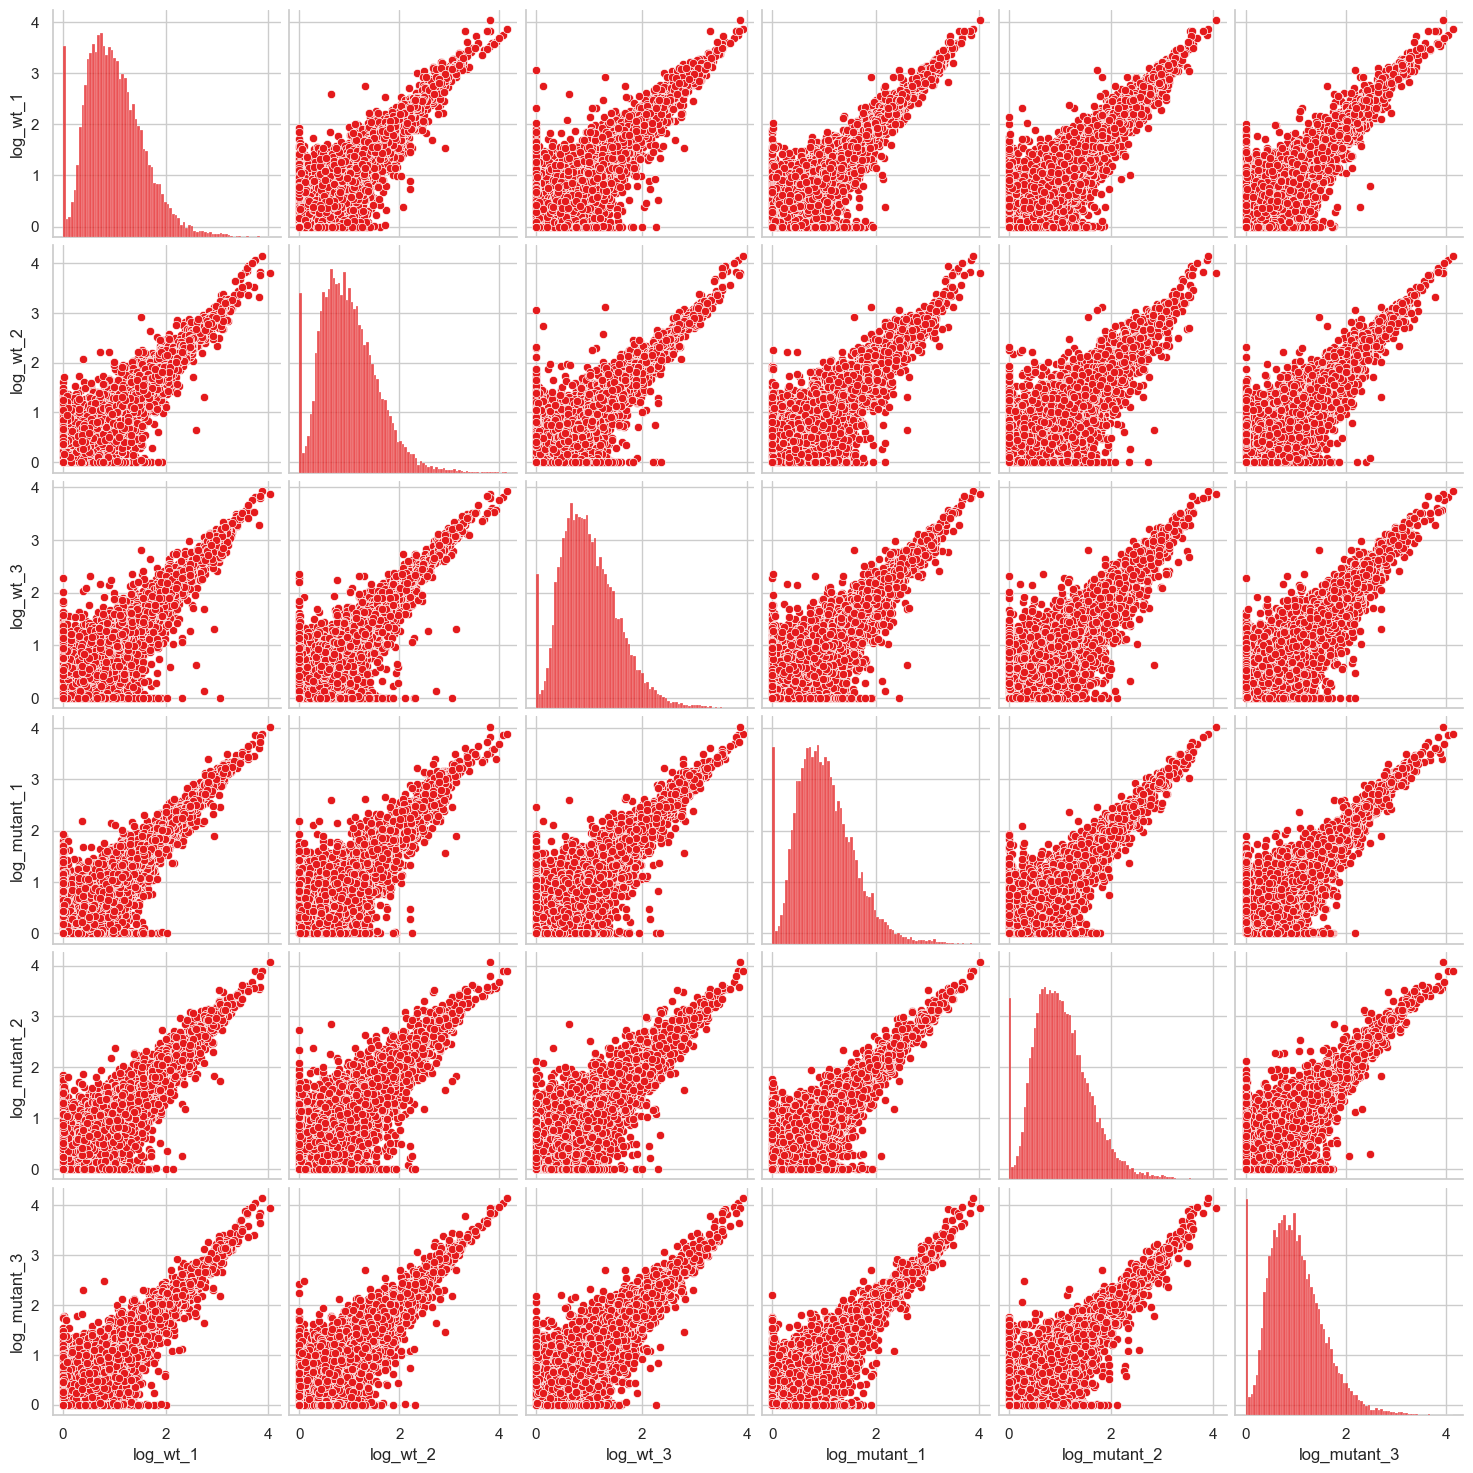

In [11]:
sns.pairplot(log_tpm, diag_kind='hist') 

## DEG のヒートマップ

<Figure size 640x480 with 0 Axes>

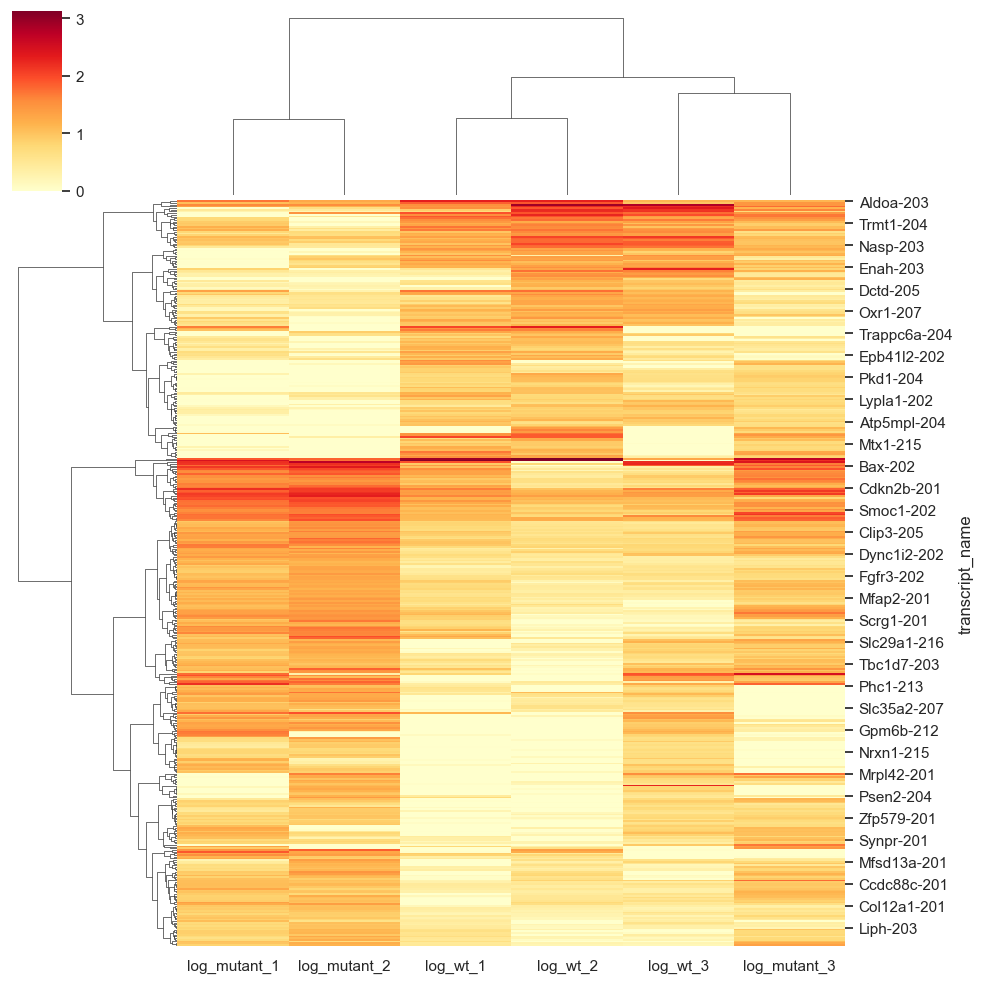

In [12]:
# log_tpm: 各サンプルのlog10TPM を計算したデータフレーム から DEG の抽出
wt_log_tpm_mean=np.log2(tpm['wt_1'] + tpm['wt_2'] + tpm['wt_3'] / 3 + 1.0) # wild type 3サンプルの平均 TPM
mutant_log_tpm_mean=np.log2(tpm['mutant_1'] + tpm['mutant_2'] + tpm['mutant_3'] / 3 + 1.0) # mutant 3サンプルの平均 TPM

mu = (wt_log_tpm_mean + mutant_log_tpm_mean) / 2
fc = wt_log_tpm_mean - mutant_log_tpm_mean

is_DEG = np.array([False] * len(fc))
is_DEG[(np.abs(fc) > 2)] = True #fold change の絶対値が > 2 のデータを発現変動遺伝子とする。
log_tpm_DEG = log_tpm.loc[is_DEG, :] # DEG を抽出
log_tpm_DEG.set_index('transcript_name', inplace=True) #グラフにtranscript_name を表示したいので index に指定

# 描画
fig=plt.figure()
sns.clustermap(log_tpm_DEG, method='ward', metric='euclidean', cmap='YlOrRd')


## ベン図  
  
matplotlib_venn ライブラリを使用する。  
2つのグループのベン図の場合 venn2, 3つのグループのベン図の場合 venn3を使用する。  
あらかじめベン図の領域の数値を計算して、subsets で引き渡す必要がある。  
subsets で指定する順番がベン図内の領域と一致している。

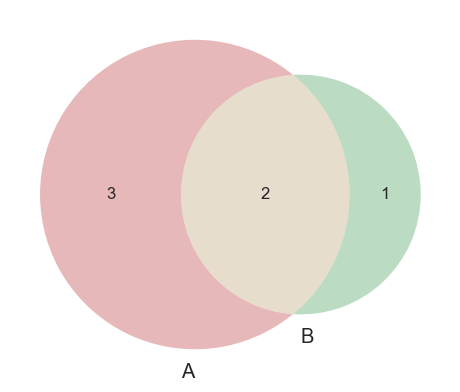

In [13]:
from matplotlib_venn import venn2

group_a = {'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5'}
group_b = {'gene_4', 'gene_5', 'gene_6'}

n_a = len(group_a - group_b)
n_b = len(group_b - group_a)
n_ab = len(group_a & group_b)

v = venn2(subsets=(n_a, n_b, n_ab), set_labels=('A','B'))

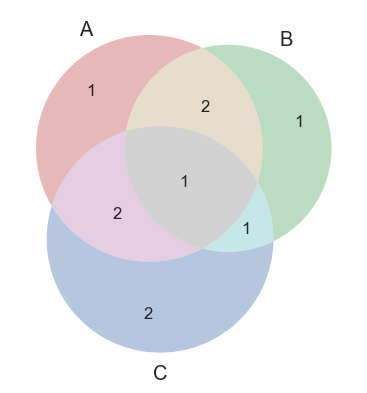

In [14]:
from matplotlib_venn import venn3

group_a = {'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6'}
group_b = {'gene_2', 'gene_4', 'gene_6', 'gene_8', 'gene_10'}
group_c = {'gene_2', 'gene_3', 'gene_5', 'gene_7', 'gene_9', 'gene_10'}

n_a = len(group_a - group_b - group_c)
n_b = len(group_b - group_a - group_c)
n_c = len(group_c - group_a - group_b)
n_ab = len((group_a & group_b) - group_c)
n_bc = len((group_b & group_c) - group_a)
n_ca = len((group_c & group_a) - group_b)
n_abc = len(group_c & group_a & group_b)

v = venn3(subsets=(n_a, n_b, n_ab, n_c, n_ca, n_bc, n_abc), set_labels=('A','B', 'C'))